In [11]:
import numpy as np
import pandas as pd
import g20_functions as g20
import g20_Pattern_Mining as g20PM
import ds_functions as ds

In [2]:
data = g20.dummify(g20.loadHeart())
values = {'Dummified by width': data[0]}

np.shape(data[0])

(299, 165)

-------------Dummified by width-------------
Processing 2436 combinations | Sampling itemset size 1210
452000 patterns


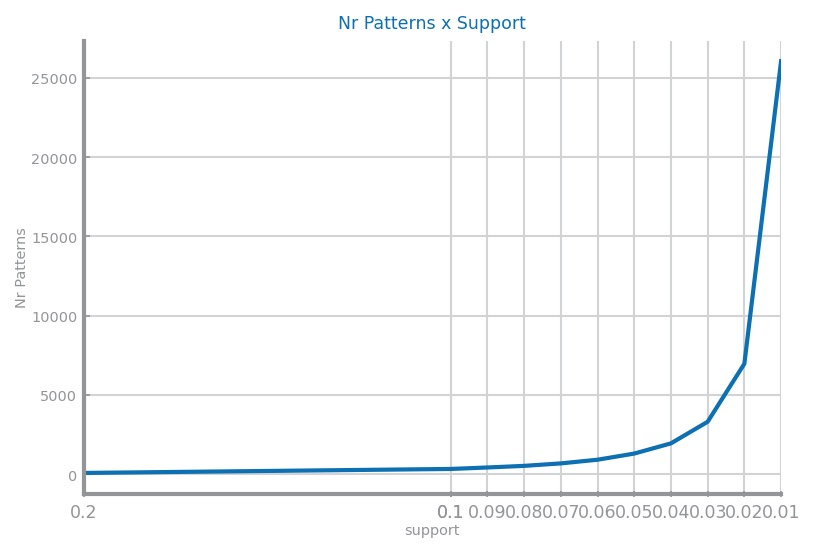

In [3]:
patterns = {}
MIN_SUP: float = 0.001
var_min_sup =[0.2, 0.1] + [i*MIN_SUP for i  in range(100, 0, -10)]
for name, data in values.items():
    print("-------------{}-------------".format(name))
    patterns[name] = g20PM.get_patterns(data,MIN_SUP)
    g20PM.plot_patterns(patterns[name],var_min_sup)

In [4]:
MIN_CONF: float = 0.2
rules = {}
for name, p in patterns.items():
    print("-------------{}-------------".format(name))
    rules[name] = g20PM.get_rules(p, MIN_CONF)

-------------Dummified by width-------------
	found 17133612 rules


Quality evaluation per support

-------------Dummified by width-------------
Analyse per support...


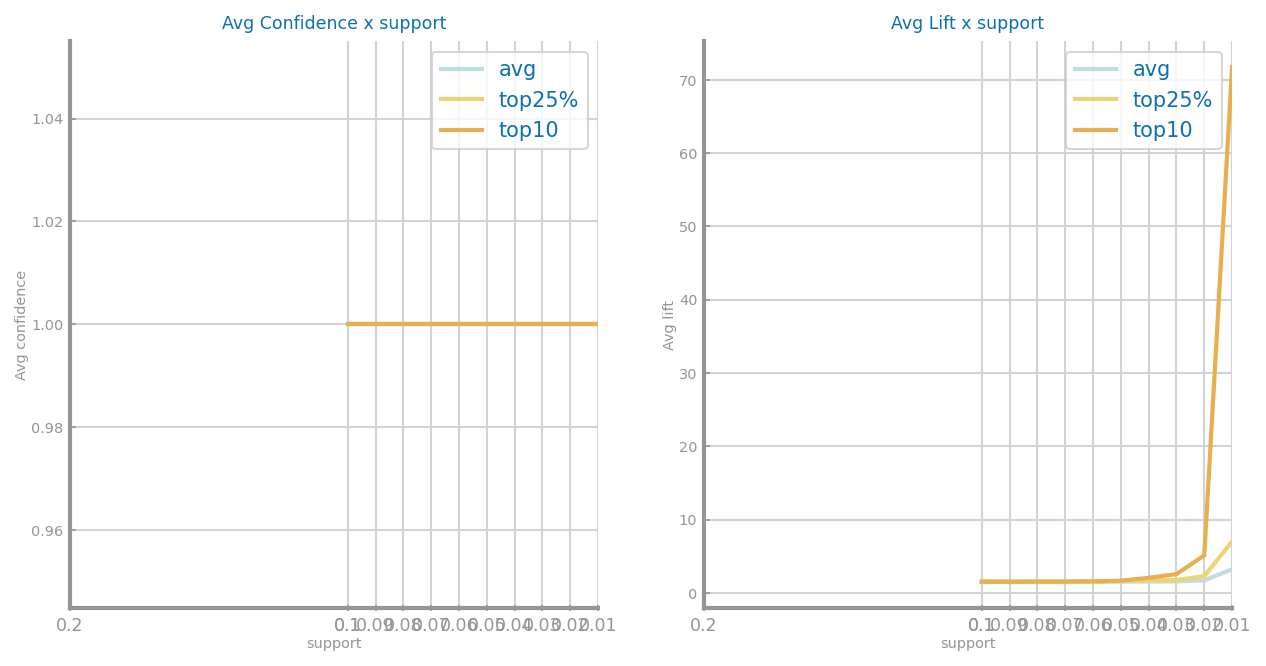

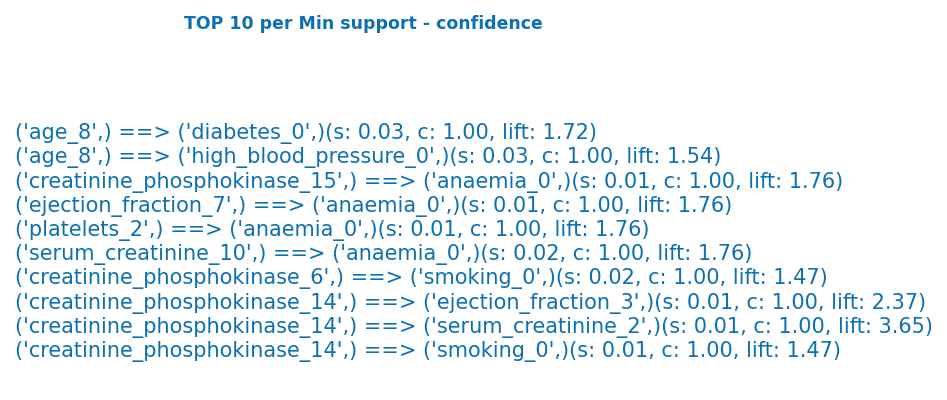

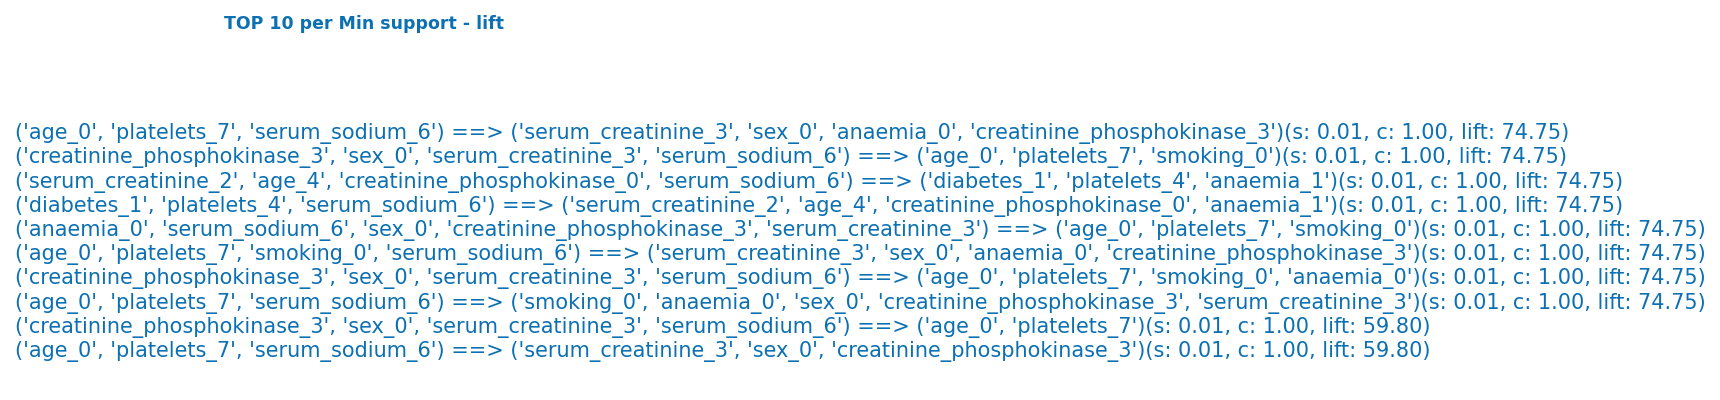

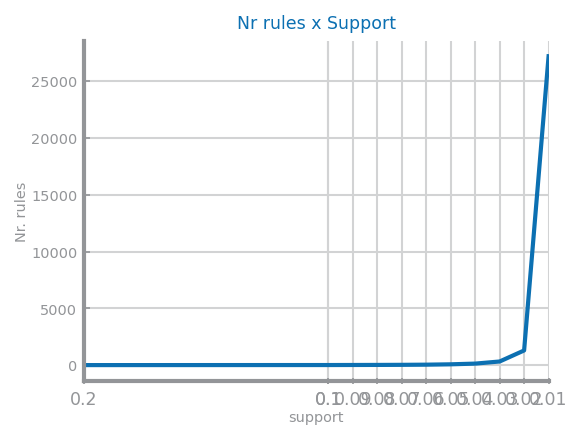

In [12]:
for name, r in rules.items():
    print("-------------{}-------------".format(name))
    nr_rules_sp = g20PM.analyse_per_metric(r, 'support', var_min_sup)
    ds.plot_line(var_min_sup, nr_rules_sp, title='Nr rules x Support', xlabel='support',
                 ylabel='Nr. rules', percentage=False)

Quality evaluation per confidence

-------------Dummified by width-------------
Analyse per confidence...


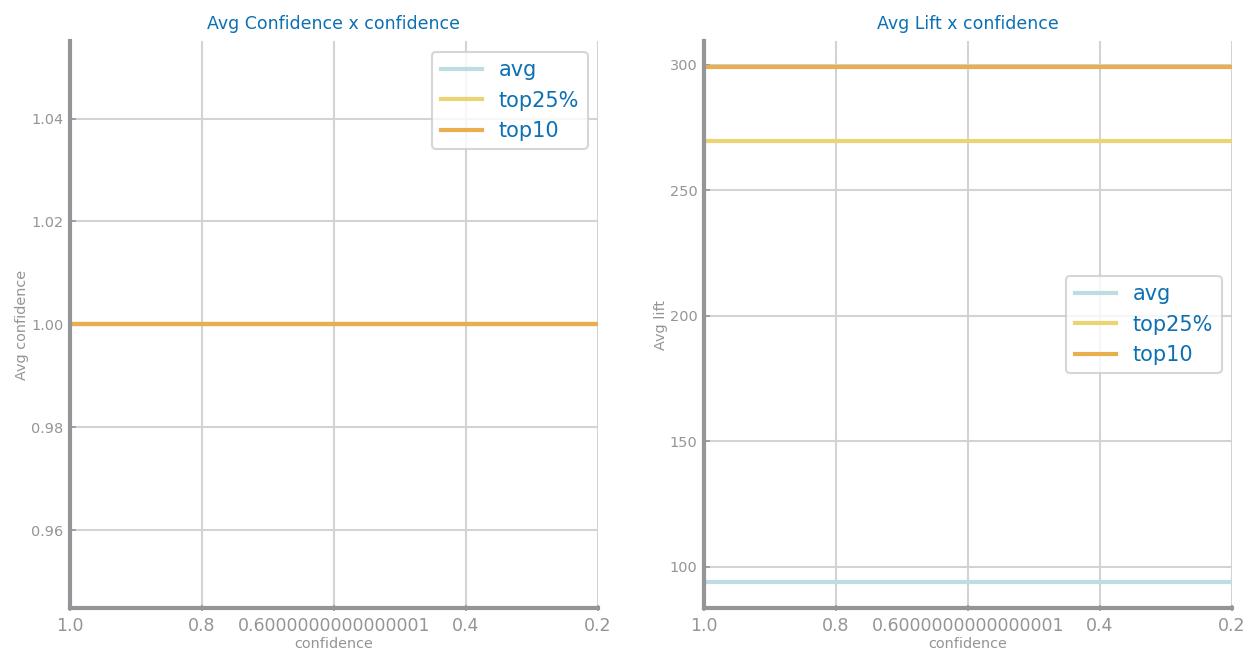

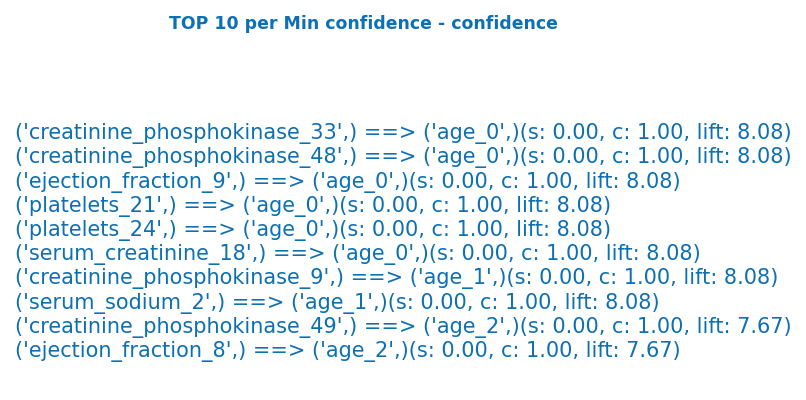

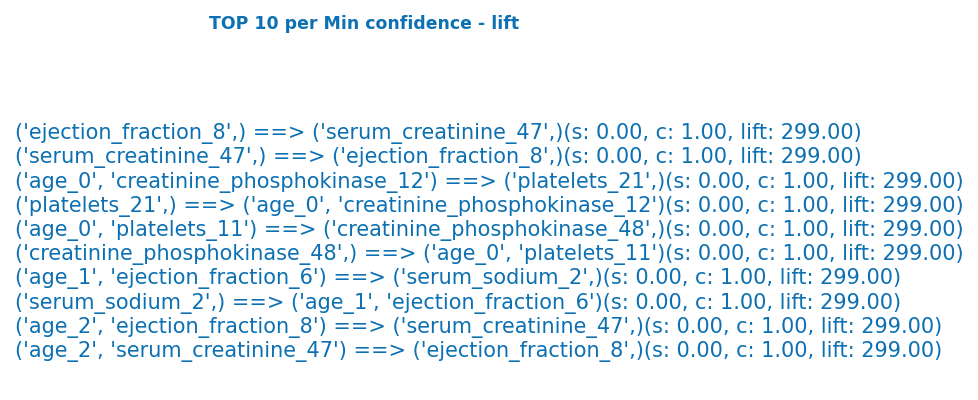

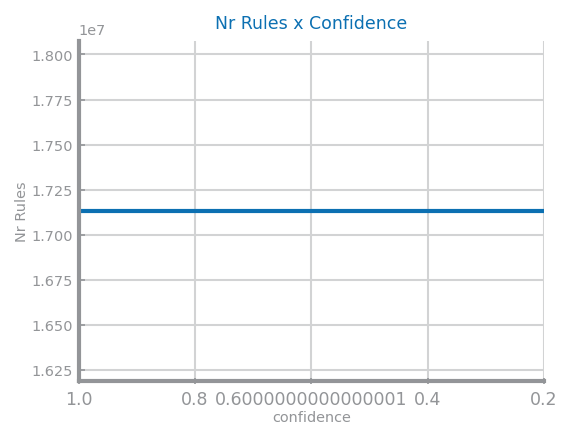

In [14]:
var_min_conf = [i * MIN_CONF for i in range(5, 0, -1)]
for name, r in rules.items():
    print("-------------{}-------------".format(name))
    nr_rules_cf = g20PM.analyse_per_metric(r, 'confidence', var_min_conf)
    ds.plot_line(var_min_conf, nr_rules_cf, title='Nr Rules x Confidence', xlabel='confidence', ylabel='Nr Rules', percentage=False)